## ----------------ASSIGNMENT : 1-----------
#### Name : Shreyash Kashyap
#### Roll : 

# Selecting best model for the PROMISE dataset part-1

### using this dataset "https://github.com/ssea-lab/PROMISE.git"

#### combining all the csv files into one 'PROMISE.CSV'

In [66]:
# import pandas as pd
# import os

# all_dfs = []

# # Loop from 1.csv to 34.csv
# for i in range(1, 35):
#     file_name = f"{i}.csv"
    
#     if os.path.exists(file_name):
#         df = pd.read_csv(file_name)
#         all_dfs.append(df)
#     else:
#         print(f"{file_name} not found")

# # Combine all files
# combined_df = pd.concat(all_dfs, ignore_index=True)

# # Save final dataset
# combined_df.to_csv("PROMISE.csv", index=False)

# print("PROMISE.csv created successfully")


### Installing important libraries

In [67]:
!uv add pandas
!uv add numpy
!uv add scikit-learn
!uv add tensorflow
!uv add matplotlib
!uv add seaborn
!uv add imbalanced-learn

Resolved 84 packages in 1ms
Audited 78 packages in 9ms
Resolved 84 packages in 3ms
Audited 78 packages in 9ms
Resolved 84 packages in 1ms
Audited 78 packages in 6ms
Resolved 84 packages in 1ms
Audited 78 packages in 5ms
Resolved 84 packages in 1ms
Audited 78 packages in 8ms
Resolved 84 packages in 1ms
Audited 78 packages in 9ms
Resolved 84 packages in 1ms
Audited 78 packages in 7ms


### Imports and Setup

In [105]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import BatchNormalization




### Loading Promise dataset

In [69]:
df = pd.read_csv("PROMISE.csv")
df.head()

,name,wmc,dit,noc,cbo,rfc,lcom,ca,ce,npm,...,dam,moa,mfa,cam,ic,cbm,amc,max_cc,avg_cc,bug
0,org.apache.tools.ant.taskdefs.ExecuteOn,11,4,2,14,42,29,2,12,5,...,1.0,1,0.885057,0.232323,3,4,34.545455,3,1.2727,0
1,org.apache.tools.ant.DefaultLogger,14,1,1,8,32,49,4,4,12,...,1.0,0,0.000000,0.307692,0,0,16.857143,6,1.6429,2
2,org.apache.tools.ant.taskdefs.TaskOutputStream,3,2,0,1,9,0,0,1,1,...,1.0,1,0.714286,0.666667,1,1,17.333333,1,0.6667,0
3,org.apache.tools.ant.taskdefs.Cvs,12,3,0,12,37,32,0,12,12,...,1.0,1,0.770833,0.458333,0,0,24.083333,3,1.4167,0
4,org.apache.tools.ant.taskdefs.Copyfile,6,3,0,4,21,1,0,4,6,...,1.0,0,0.880952,0.416667,2,2,21.000000,1,0.8333,0


In [70]:
print(df.isnull().sum())
print(df.info())

name      0
wmc       0
dit       0
noc       0
cbo       0
rfc       0
lcom      0
ca        0
ce        0
npm       0
lcom3     0
loc       0
dam       0
moa       0
mfa       0
cam       0
ic        0
cbm       0
amc       0
max_cc    0
avg_cc    0
bug       0
dtype: int64
<class 'pandas.DataFrame'>
RangeIndex: 13246 entries, 0 to 13245
Data columns (total 22 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   name    13246 non-null  str    
 1   wmc     13246 non-null  int64  
 2   dit     13246 non-null  int64  
 3   noc     13246 non-null  int64  
 4   cbo     13246 non-null  int64  
 5   rfc     13246 non-null  int64  
 6   lcom    13246 non-null  int64  
 7   ca      13246 non-null  int64  
 8   ce      13246 non-null  int64  
 9   npm     13246 non-null  int64  
 10  lcom3   13246 non-null  float64
 11  loc     13246 non-null  int64  
 12  dam     13246 non-null  float64
 13  moa     13246 non-null  int64  
 14  mfa     13246 non-null  floa

### cleaning the dataset

In [71]:
df.head(5)

,name,wmc,dit,noc,cbo,rfc,lcom,ca,ce,npm,...,dam,moa,mfa,cam,ic,cbm,amc,max_cc,avg_cc,bug
0,org.apache.tools.ant.taskdefs.ExecuteOn,11,4,2,14,42,29,2,12,5,...,1.0,1,0.885057,0.232323,3,4,34.545455,3,1.2727,0
1,org.apache.tools.ant.DefaultLogger,14,1,1,8,32,49,4,4,12,...,1.0,0,0.000000,0.307692,0,0,16.857143,6,1.6429,2
2,org.apache.tools.ant.taskdefs.TaskOutputStream,3,2,0,1,9,0,0,1,1,...,1.0,1,0.714286,0.666667,1,1,17.333333,1,0.6667,0
3,org.apache.tools.ant.taskdefs.Cvs,12,3,0,12,37,32,0,12,12,...,1.0,1,0.770833,0.458333,0,0,24.083333,3,1.4167,0
4,org.apache.tools.ant.taskdefs.Copyfile,6,3,0,4,21,1,0,4,6,...,1.0,0,0.880952,0.416667,2,2,21.000000,1,0.8333,0


In [72]:
df.iloc[:5, -1]


0    0
1    2
2    0
3    0
4    0
Name: bug, dtype: int64

In [73]:
print(df['name'].unique())

<StringArray>
[                   'org.apache.tools.ant.taskdefs.ExecuteOn',
                         'org.apache.tools.ant.DefaultLogger',
             'org.apache.tools.ant.taskdefs.TaskOutputStream',
                          'org.apache.tools.ant.taskdefs.Cvs',
                     'org.apache.tools.ant.taskdefs.Copyfile',
                'org.apache.tools.ant.util.GlobPatternMapper',
                         'org.apache.tools.ant.taskdefs.Move',
                        'org.apache.tools.tar.TarInputStream',
                  'org.apache.tools.ant.taskdefs.CompileTask',
                      'org.apache.tools.ant.types.PatternSet',
 ...
        'org.apache.xerces.parsers.AbstractXMLDocumentParser',
              'org.apache.xerces.dom3.as.DOMImplementationAS',
                       'org.apache.xerces.dom3.as.DocumentAS',
                   'org.apache.xerces.impl.xs.XSParticleDecl',
                  'org.apache.xerces.impl.xpath.regex.REUtil',
                   'org.apache.xerce

In [74]:
# 1. Drop non-useful column
df = df.drop("name", axis=1)

# 2. Convert bug count → binary classification
df['bug'] = df['bug'].apply(lambda x: 1 if x > 0 else 0)

# 3. Check class distribution
print(df['bug'].value_counts())


bug
0    8814
1    4432
Name: count, dtype: int64


In [75]:
df.head(3)

,wmc,dit,noc,cbo,rfc,lcom,ca,ce,npm,lcom3,...,dam,moa,mfa,cam,ic,cbm,amc,max_cc,avg_cc,bug
0,11,4,2,14,42,29,2,12,5,0.725000,...,1.0,1,0.885057,0.232323,3,4,34.545455,3,1.2727,0
1,14,1,1,8,32,49,4,4,12,0.835165,...,1.0,0,0.000000,0.307692,0,0,16.857143,6,1.6429,1
2,3,2,0,1,9,0,0,1,1,0.000000,...,1.0,1,0.714286,0.666667,1,1,17.333333,1,0.6667,0


### initialising dependent and independent features

In [76]:
x = df.drop('bug',axis=1)
y = df['bug'] #taget column

In [77]:
x

,wmc,dit,noc,cbo,rfc,lcom,ca,ce,npm,lcom3,loc,dam,moa,mfa,cam,ic,cbm,amc,max_cc,avg_cc
0,11,4,2,14,42,29,2,12,5,0.725000,395,1.000000,1,0.885057,0.232323,3,4,34.545455,3,1.2727
1,14,1,1,8,32,49,4,4,12,0.835165,257,1.000000,0,0.000000,0.307692,0,0,16.857143,6,1.6429
2,3,2,0,1,9,0,0,1,1,0.000000,58,1.000000,1,0.714286,0.666667,1,1,17.333333,1,0.6667
3,12,3,0,12,37,32,0,12,12,0.858586,310,1.000000,1,0.770833,0.458333,0,0,24.083333,3,1.4167
4,6,3,0,4,21,1,0,4,6,0.700000,136,1.000000,0,0.880952,0.416667,2,2,21.000000,1,0.8333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13241,0,1,0,2,0,0,1,1,0,2.000000,0,0.000000,0,0.000000,0.000000,0,0,0.000000,0,0.0000
13242,12,2,0,9,39,20,2,7,10,0.626263,568,0.888889,1,0.230769,0.273810,0,0,45.583333,2,1.0000
13243,6,1,0,7,12,0,1,6,6,0.766667,246,1.000000,2,0.000000,0.416667,0,0,39.000000,13,3.5000
13244,12,1,0,10,18,0,10,0,11,0.054545,517,0.000000,0,0.000000,0.416667,1,1,41.666667,7,3.7500


In [78]:
y

0        0
1        1
2        0
3        0
4        0
        ..
13241    1
13242    1
13243    1
13244    1
13245    1
Name: bug, Length: 13246, dtype: int64

### Train-Test Split

In [79]:
x_train , x_test, y_train, y_test = train_test_split(
    x,y,test_size=0.2, random_state=42
)

### Feature scaling

In [80]:
scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

## Decision Tree Model

In [81]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Create model
dt_model = DecisionTreeClassifier(random_state=42)

# Train
dt_model.fit(x_train, y_train)

# Predict
y_pred_dt = dt_model.predict(x_test)

# Accuracy
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))

# Detailed report
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt))

# Confusion Matrix
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))


Decision Tree Accuracy: 0.6667924528301887

Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.78      0.76      1768
           1       0.50      0.44      0.47       882

    accuracy                           0.67      2650
   macro avg       0.62      0.61      0.61      2650
weighted avg       0.66      0.67      0.66      2650


Confusion Matrix:
 [[1381  387]
 [ 496  386]]


#### Accuracy of current DT model is low, so we'll do hyperparamter tunining of DT mdoel in order to increase accuracy

## Hyperparameter Tuning of Decision-Tree using GridSearchCV



In [82]:
model = DecisionTreeClassifier(random_state=42)

params = {
    "criterion": ["gini", "entropy", "log_loss"],
    "splitter": ["best", "random"],

    # Tree size control 
    "max_depth": [None, 3, 5, 7, 9, 12, 15, 20],

    # Minimum samples to split a node
    "min_samples_split": [2, 5, 10, 20, 50],

    # Minimum samples at leaf node
    "min_samples_leaf": [1, 2, 5, 10, 20],

    # Number of features considered at each split
    "max_features": [None, "sqrt", "log2"],

    # Pruning parameter (very powerful)
    "ccp_alpha": [0.0, 0.0001, 0.001, 0.01, 0.1]
}


grid = GridSearchCV(
    estimator=model,
    param_grid=params,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=2
)

grid.fit(x_train, y_train)

print("Best Params:", grid.best_params_)
print("Best Score:", grid.best_score_)




Fitting 5 folds for each of 18000 candidates, totalling 90000 fits
Best Params: {'ccp_alpha': 0.001, 'criterion': 'entropy', 'max_depth': 15, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 10, 'splitter': 'random'}
Best Score: 0.7101738538114276


In [83]:
best_rf = grid.best_estimator_
best_rf

,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.",'entropy'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'random'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",15
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",10
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",2
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... note:: The search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",42
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow a tree with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the cur

In [84]:
y_pred_dt_tuned = best_rf.predict(x_test)


In [85]:

# Accuracy
print("Tuned Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt_tuned))

# Detailed report
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt_tuned))

# Confusion Matrix
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_dt_tuned))


Tuned Decision Tree Accuracy: 0.7030188679245283

Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.92      0.80      1768
           1       0.62      0.27      0.38       882

    accuracy                           0.70      2650
   macro avg       0.67      0.59      0.59      2650
weighted avg       0.69      0.70      0.66      2650


Confusion Matrix:
 [[1624  144]
 [ 643  239]]


In [86]:

print("Normal DT accuracy = ", accuracy_score(y_test,y_pred_dt))
print("Tuned DT accuracy ", accuracy_score(y_test,y_pred_dt_tuned))

Normal DT accuracy =  0.6667924528301887
Tuned DT accuracy  0.7030188679245283


# Random Forest Model

In [87]:
rf_model = RandomForestClassifier(
    n_estimators=300,
    max_depth=12,
    min_samples_split=10,
    min_samples_leaf=4,
    max_features='sqrt',
    bootstrap=True,
    oob_score=True,
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)

rf_model.fit(x_train, y_train)

# Train
rf_model.fit(x_train, y_train)

# Predict
y_pred_rf = rf_model.predict(x_test)

# Accuracy
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))

# Detailed report
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

# Confusion Matrix
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))


Random Forest Accuracy: 0.7018867924528301

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.79      0.78      1768
           1       0.56      0.52      0.54       882

    accuracy                           0.70      2650
   macro avg       0.66      0.66      0.66      2650
weighted avg       0.70      0.70      0.70      2650


Confusion Matrix:
 [[1397  371]
 [ 419  463]]


#### Accuracy of current Random Forest Model is low, so we'll do Hyperparameter Tuning of the current Random Forest model in order to increase the accuracy

# HyperParameter tuning of the RandomForest using RandomizedSearchCV

In [88]:
rf = RandomForestClassifier(random_state=42)

param_dist = {
    "n_estimators": np.arange(200, 800, 100),
    "max_depth": [None, 8, 10, 12, 15, 20],
    "min_samples_split": [2, 5, 10, 20, 50],
    "min_samples_leaf": [1, 2, 4, 8, 16],
    "max_features": ["sqrt", "log2", None],
    "bootstrap": [True, False]
}

random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=40,           # number of combinations to try
    cv=5,
    scoring="accuracy",
    verbose=2,
    n_jobs=-1,
    random_state=42
)

random_search.fit(x_train, y_train)

print("Best Parameters:", random_search.best_params_)
print("Best CV Score:", random_search.best_score_)


Fitting 5 folds for each of 40 candidates, totalling 200 fits
Best Parameters: {'n_estimators': np.int64(600), 'min_samples_split': 20, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 10, 'bootstrap': False}
Best CV Score: 0.7221596605732501


In [89]:
best_rf = random_search.best_estimator_
y_pred_rf_tuned = best_rf.predict(x_test)

In [90]:
# Accuracy
print("Tuned Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf_tuned))

# Detailed report
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf_tuned))

# Confusion Matrix
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf_tuned))


Tuned Random Forest Accuracy: 0.7181132075471698

Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.90      0.81      1768
           1       0.64      0.35      0.45       882

    accuracy                           0.72      2650
   macro avg       0.69      0.62      0.63      2650
weighted avg       0.70      0.72      0.69      2650


Confusion Matrix:
 [[1598  170]
 [ 577  305]]


In [91]:
print("Normal Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Tuned Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf_tuned))



Normal Random Forest Accuracy: 0.7018867924528301
Tuned Random Forest Accuracy: 0.7181132075471698


In [92]:
X_train = x_train
X_test = x_test

## KNN Model


In [93]:
# Create model
knn_model = KNeighborsClassifier(n_neighbors=5)

# Train
knn_model.fit(X_train, y_train)

# Predict
y_pred_knn = knn_model.predict(X_test)

# Accuracy
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))

# Detailed report
print("\nClassification Report:\n", classification_report(y_test, y_pred_knn))

# Confusion Matrix
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))


KNN Accuracy: 0.7033962264150944

Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.86      0.79      1768
           1       0.58      0.40      0.47       882

    accuracy                           0.70      2650
   macro avg       0.66      0.63      0.63      2650
weighted avg       0.69      0.70      0.69      2650


Confusion Matrix:
 [[1512  256]
 [ 530  352]]


#### accuracy of current KNN model is low, so we'll do hyperparameter tuning of current KNN model in order to increase the accuracy

# Hyperparameter Tunining of KNN using GridSearchCV

In [94]:
knn = KNeighborsClassifier()

param_grid = {
    "n_neighbors": range(1, 31),
    "weights": ["uniform", "distance"],
    "metric": ["minkowski", "euclidean", "manhattan"],
    "p": [1, 2]
}

grid_knn = GridSearchCV(
    estimator=knn,
    param_grid=param_grid,
    cv=5,
    scoring="accuracy",
    n_jobs=-1
)

grid_knn.fit(X_train, y_train)

print("Best Params:", grid_knn.best_params_)
print("Best CV Score:", grid_knn.best_score_)


Best Params: {'metric': 'minkowski', 'n_neighbors': 11, 'p': 1, 'weights': 'uniform'}
Best CV Score: 0.7145149901608983


In [95]:
best_knn = grid_knn.best_estimator_

y_pred_knn_tuned = best_knn.predict(X_test)

print("Tuned KNN Accuracy:", accuracy_score(y_test, y_pred_knn_tuned))
print("\nClassification Report:\n", classification_report(y_test, y_pred_knn_tuned))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_knn_tuned))


Tuned KNN Accuracy: 0.7166037735849057

Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.89      0.81      1768
           1       0.62      0.38      0.47       882

    accuracy                           0.72      2650
   macro avg       0.68      0.63      0.64      2650
weighted avg       0.70      0.72      0.69      2650


Confusion Matrix:
 [[1568  200]
 [ 551  331]]


In [96]:
print("Normal KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Tuned KNN Accuracy:", accuracy_score(y_test, y_pred_knn_tuned))


Normal KNN Accuracy: 0.7033962264150944
Tuned KNN Accuracy: 0.7166037735849057


## ANN MODEL

In [97]:
# Build ANN model
ann_model = Sequential()

ann_model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
ann_model.add(Dense(32, activation='relu'))
ann_model.add(Dense(1, activation='sigmoid'))  # binary output

# Compile
ann_model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Prevent overfitting
early_stop = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

# Train
history = ann_model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)

# Evaluate
loss, acc = ann_model.evaluate(X_test, y_test)

print("ANN Accuracy:", acc)


Epoch 1/100


c:\Users\KIIT\OneDrive\Desktop\assignment-1\.venv\Lib\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


265/265 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.6922 - loss: 0.5956 - val_accuracy: 0.6868 - val_loss: 0.6094
Epoch 2/100
265/265 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7074 - loss: 0.5766 - val_accuracy: 0.6868 - val_loss: 0.6059
Epoch 3/100
265/265 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7114 - loss: 0.5716 - val_accuracy: 0.7000 - val_loss: 0.5961
Epoch 4/100
265/265 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7190 - loss: 0.5663 - val_accuracy: 0.7019 - val_loss: 0.5894
Epoch 5/100
265/265 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7185 - loss: 0.5614 - val_accuracy: 0.7038 - val_loss: 0.5982
Epoch 6/100
265/265 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7230 - loss: 0.5607 - val_accuracy: 0.7075 - val_loss: 0.5860
Epoch 7/100
265/265 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7278 - loss: 0.5570 - val_accuracy: 0.7075 - val_loss: 0.5939
Epoch 8/100
265/265 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7289 - loss: 0.5526 - val_accuracy: 0.7113

In [98]:
# Convert probabilities → 0/1
y_pred_ann = (ann_model.predict(X_test) > 0.5).astype("int32")

print("\nClassification Report:\n", classification_report(y_test, y_pred_ann))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_ann))


83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.89      0.81      1768
           1       0.62      0.37      0.46       882

    accuracy                           0.71      2650
   macro avg       0.68      0.63      0.63      2650
weighted avg       0.70      0.71      0.69      2650


Confusion Matrix:
 [[1567  201]
 [ 557  325]]


#### current accuracy of ANN model is low, so we'll do some tuning of current ANN model

## Tuning ANN model

In [99]:
ann_model = Sequential()

ann_model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
ann_model.add(Dropout(0.3))

ann_model.add(Dense(64, activation='relu'))
ann_model.add(Dropout(0.3))

ann_model.add(Dense(1, activation='sigmoid'))


# Compile
ann_model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Prevent overfitting
early_stop = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

# Train
history = ann_model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)

# Evaluate
loss, acc = ann_model.evaluate(X_test, y_test)

print("Trained ANN Accuracy:", acc)


Epoch 1/100


c:\Users\KIIT\OneDrive\Desktop\assignment-1\.venv\Lib\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


265/265 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6858 - loss: 0.6074 - val_accuracy: 0.6925 - val_loss: 0.6116
Epoch 2/100
265/265 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6986 - loss: 0.5898 - val_accuracy: 0.6929 - val_loss: 0.5999
Epoch 3/100
265/265 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7016 - loss: 0.5829 - val_accuracy: 0.6986 - val_loss: 0.5971
Epoch 4/100
265/265 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7093 - loss: 0.5810 - val_accuracy: 0.6991 - val_loss: 0.5950
Epoch 5/100
265/265 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7088 - loss: 0.5784 - val_accuracy: 0.6939 - val_loss: 0.5928
Epoch 6/100
265/265 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7097 - loss: 0.5777 - val_accuracy: 0.7009 - val_loss: 0.5922
Epoch 7/100
265/265 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7148 - loss: 0.5755 - val_accuracy: 0.7033 - val_loss: 0.5930
Epoch 8/100
265/265 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7144 - loss: 0.5720 - val_accuracy: 0.7047

In [100]:
# Convert probabilities → 0/1
y_pred_ann_tuned = (ann_model.predict(X_test) > 0.5).astype("int32")

print("\nClassification Report:\n", classification_report(y_test, y_pred_ann_tuned))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_ann_tuned))

83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.89      0.81      1768
           1       0.63      0.36      0.46       882

    accuracy                           0.72      2650
   macro avg       0.68      0.63      0.63      2650
weighted avg       0.70      0.72      0.69      2650


Confusion Matrix:
 [[1577  191]
 [ 562  320]]


In [101]:
print("Normal ANN Classification Report:\n", classification_report(y_test, y_pred_ann))
print("\nTuned ANN Classification Report:\n", classification_report(y_test, y_pred_ann_tuned))


Normal ANN Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.89      0.81      1768
           1       0.62      0.37      0.46       882

    accuracy                           0.71      2650
   macro avg       0.68      0.63      0.63      2650
weighted avg       0.70      0.71      0.69      2650


Tuned ANN Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.89      0.81      1768
           1       0.63      0.36      0.46       882

    accuracy                           0.72      2650
   macro avg       0.68      0.63      0.63      2650
weighted avg       0.70      0.72      0.69      2650



## DNN model

In [102]:
# Build DNN model
dnn_model = Sequential()

dnn_model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
dnn_model.add(Dropout(0.3))

dnn_model.add(Dense(64, activation='relu'))
dnn_model.add(Dropout(0.3))

dnn_model.add(Dense(32, activation='relu'))
dnn_model.add(Dense(1, activation='sigmoid'))

# Compile
dnn_model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True)

# Train
history = dnn_model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=80,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)

# Evaluate
loss, acc = dnn_model.evaluate(X_test, y_test)
print("DNN Accuracy:", acc)


Epoch 1/80


c:\Users\KIIT\OneDrive\Desktop\assignment-1\.venv\Lib\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


265/265 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6871 - loss: 0.6040 - val_accuracy: 0.6778 - val_loss: 0.6038
Epoch 2/80
265/265 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6957 - loss: 0.5892 - val_accuracy: 0.6972 - val_loss: 0.6054
Epoch 3/80
265/265 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7013 - loss: 0.5826 - val_accuracy: 0.6976 - val_loss: 0.5989
Epoch 4/80
265/265 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7020 - loss: 0.5811 - val_accuracy: 0.6991 - val_loss: 0.6000
Epoch 5/80
265/265 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7068 - loss: 0.5777 - val_accuracy: 0.6981 - val_loss: 0.5941
Epoch 6/80
265/265 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7113 - loss: 0.5761 - val_accuracy: 0.7066 - val_loss: 0.5892
Epoch 7/80
265/265 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7157 - loss: 0.5733 - val_accuracy: 0.7085 - val_loss: 0.5881
Epoch 8/80
265/265 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7155 - loss: 0.5720 - val_accuracy: 0.7038 - val_

In [103]:
y_pred_dnn = (dnn_model.predict(X_test) > 0.5).astype("int32")

print("\nClassification Report:\n", classification_report(y_test, y_pred_dnn))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_dnn))


83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.89      0.81      1768
           1       0.64      0.39      0.48       882

    accuracy                           0.72      2650
   macro avg       0.69      0.64      0.65      2650
weighted avg       0.71      0.72      0.70      2650


Confusion Matrix:
 [[1572  196]
 [ 539  343]]


#### current accuracy of DNN model is low, so we'll do some tuning of current DNN model

## Tuning DNN

In [106]:

dnn_model = Sequential()

dnn_model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
dnn_model.add(BatchNormalization())
dnn_model.add(Dropout(0.3))

dnn_model.add(Dense(64, activation='relu'))
dnn_model.add(BatchNormalization())
dnn_model.add(Dropout(0.3))

dnn_model.add(Dense(32, activation='relu'))
dnn_model.add(Dropout(0.2))

dnn_model.add(Dense(1, activation='sigmoid'))

dnn_model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

early_stop = EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True)

history = dnn_model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=80,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)

loss, acc = dnn_model.evaluate(X_test, y_test)
print("tuned DNN Accuracy:", acc)


Epoch 1/80
265/265 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6413 - loss: 0.6736 - val_accuracy: 0.6675 - val_loss: 0.6129
Epoch 2/80
265/265 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6884 - loss: 0.6095 - val_accuracy: 0.6783 - val_loss: 0.6011
Epoch 3/80
265/265 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6859 - loss: 0.6023 - val_accuracy: 0.6844 - val_loss: 0.6002
Epoch 4/80
265/265 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7054 - loss: 0.5884 - val_accuracy: 0.6925 - val_loss: 0.5940
Epoch 5/80
265/265 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7032 - loss: 0.5876 - val_accuracy: 0.6943 - val_loss: 0.5924
Epoch 6/80
265/265 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7114 - loss: 0.5830 - val_accuracy: 0.6901 - val_loss: 0.5917
Epoch 7/80
265/265 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7117 - loss: 0.5771 - val_accuracy: 0.6906 - val_loss: 0.5904
Epoch 8/80
265/265 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7102 - loss: 0.5760 - val_accuracy: 0.

In [107]:
y_pred_dnn_tuned = (dnn_model.predict(X_test) > 0.5).astype("int32")

print("\nClassification Report:\n", classification_report(y_test, y_pred_dnn_tuned))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_dnn_tuned))

83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step

Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.90      0.81      1768
           1       0.63      0.33      0.43       882

    accuracy                           0.71      2650
   macro avg       0.68      0.62      0.62      2650
weighted avg       0.70      0.71      0.68      2650


Confusion Matrix:
 [[1598  170]
 [ 592  290]]


In [108]:
print("\nNormal DNN Classification Report:\n", classification_report(y_test, y_pred_dnn))
print("\nTuned DNN Classification Report:\n", classification_report(y_test, y_pred_dnn_tuned))



Normal DNN Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.89      0.81      1768
           1       0.64      0.39      0.48       882

    accuracy                           0.72      2650
   macro avg       0.69      0.64      0.65      2650
weighted avg       0.71      0.72      0.70      2650


Tuned DNN Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.90      0.81      1768
           1       0.63      0.33      0.43       882

    accuracy                           0.71      2650
   macro avg       0.68      0.62      0.62      2650
weighted avg       0.70      0.71      0.68      2650



# FINAL COMPARISION OF ALL MODELS


In [109]:
from sklearn.metrics import precision_score, recall_score, f1_score

results = {}

def evaluate_model(name, y_true, y_pred):
    results[name] = {
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred),
        "Recall": recall_score(y_true, y_pred),
        "F1 Score": f1_score(y_true, y_pred)
    }

evaluate_model("Decision Tree", y_test, y_pred_dt)
evaluate_model("Tuned Decision Tree", y_test, y_pred_dt_tuned)

evaluate_model("Random Forest", y_test, y_pred_rf)
evaluate_model("Tuned Random Forest", y_test, y_pred_rf_tuned)

evaluate_model("KNN", y_test, y_pred_knn) # tuned one had better accuracy
evaluate_model("Tuned KNN", y_test, y_pred_knn_tuned) # tuned one had better accuracy

evaluate_model("ANN", y_test, y_pred_ann) # tuned one had better accuracy
evaluate_model("Tuned ANN", y_test, y_pred_ann_tuned) # tuned one had better accuracy

evaluate_model("DNN", y_test, y_pred_dnn) #tuned one has better accuracy
evaluate_model("Tuned DNN", y_test, y_pred_dnn_tuned) #tuned one has better accuracy


In [110]:
results_df = pd.DataFrame(results).T
print(results_df)


                     Accuracy  Precision    Recall  F1 Score
Decision Tree        0.666792   0.499353  0.437642  0.466465
Tuned Decision Tree  0.703019   0.624021  0.270975  0.377866
Random Forest        0.701887   0.555156  0.524943  0.539627
Tuned Random Forest  0.718113   0.642105  0.345805  0.449521
KNN                  0.703396   0.578947  0.399093  0.472483
Tuned KNN            0.716604   0.623352  0.375283  0.468507
ANN                  0.713962   0.617871  0.368481  0.461648
Tuned ANN            0.715849   0.626223  0.362812  0.459440
DNN                  0.722642   0.636364  0.388889  0.482759
Tuned DNN            0.712453   0.630435  0.328798  0.432191


## Conclusion : DNN performed best for the PROMISE dataset with an accuracy of 72%.

----------------------------------------------------------------------

# Selecting best model for the PROMISE dataset part : 2


### using this dataset :- "https://github.com/alrz1999/PROMISE-dataset-csv.git"

### imports and setup

In [111]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import LinearSVC
from imblearn.over_sampling import SMOTE
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.calibration import CalibratedClassifierCV

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional


### Loading dataset

In [112]:
df = pd.read_csv("ant-1.3_ground-truth-files_dataset.csv")
df.head()

,File,Bug,SRC
0,org/apache/tools/ant/taskdefs/ExecuteOn.java,False,"/*\n * The Apache Software License, Version 1...."
1,org/apache/tools/ant/DefaultLogger.java,True,"/*\n * The Apache Software License, Version 1...."
2,org/apache/tools/ant/taskdefs/TaskOutputStream...,False,"/*\n * The Apache Software License, Version 1...."
3,org/apache/tools/ant/taskdefs/Cvs.java,False,"/*\n * The Apache Software License, Version 1...."
4,org/apache/tools/ant/taskdefs/Copyfile.java,False,"/*\n * The Apache Software License, Version 1...."


### checking null values

In [113]:
df.isnull().sum()

File    0
Bug     0
SRC     0
dtype: int64

In [114]:
df.info

<bound method DataFrame.info of                                                   File    Bug  \
0         org/apache/tools/ant/taskdefs/ExecuteOn.java  False   
1              org/apache/tools/ant/DefaultLogger.java   True   
2    org/apache/tools/ant/taskdefs/TaskOutputStream...  False   
3               org/apache/tools/ant/taskdefs/Cvs.java  False   
4          org/apache/tools/ant/taskdefs/Copyfile.java  False   
..                                                 ...    ...   
111         org/apache/tools/ant/taskdefs/Javadoc.java  False   
112           org/apache/tools/ant/BuildException.java  False   
113      org/apache/tools/ant/IntrospectionHelper.java   True   
114           org/apache/tools/ant/NoBannerLogger.java  False   
115             org/apache/tools/mail/MailMessage.java  False   

                                                   SRC  
0    /*\n * The Apache Software License, Version 1....  
1    /*\n * The Apache Software License, Version 1....  
2    /*\n * The 

### Cleaning Dataset

In [115]:
df.head(5)

,File,Bug,SRC
0,org/apache/tools/ant/taskdefs/ExecuteOn.java,False,"/*\n * The Apache Software License, Version 1...."
1,org/apache/tools/ant/DefaultLogger.java,True,"/*\n * The Apache Software License, Version 1...."
2,org/apache/tools/ant/taskdefs/TaskOutputStream...,False,"/*\n * The Apache Software License, Version 1...."
3,org/apache/tools/ant/taskdefs/Cvs.java,False,"/*\n * The Apache Software License, Version 1...."
4,org/apache/tools/ant/taskdefs/Copyfile.java,False,"/*\n * The Apache Software License, Version 1...."


In [116]:
df['Bug'].value_counts()

Bug
False    99
True     17
Name: count, dtype: int64

### Checking Imbalance

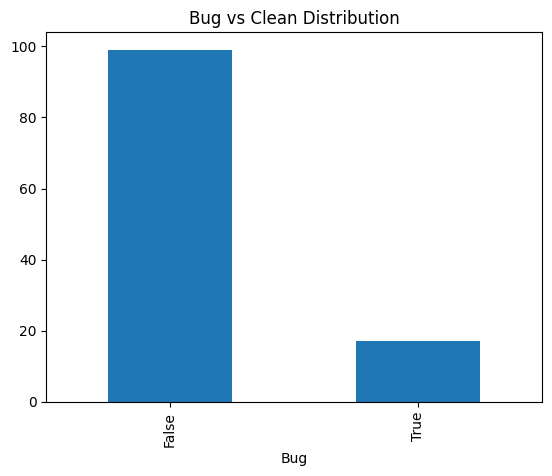

In [117]:
df['Bug'].value_counts().plot(kind='bar')
plt.title("Bug vs Clean Distribution")
plt.show()

#### this is imbalance dataset, we'll balance it later, if we'll get very low accuracy

### Converting label data into numberic data

In [118]:
df['Bug']

0      False
1       True
2      False
3      False
4      False
       ...  
111    False
112    False
113     True
114    False
115    False
Name: Bug, Length: 116, dtype: bool

In [119]:
df['Bug'] = df['Bug'].astype(int)
df['Bug'].head()

0    0
1    1
2    0
3    0
4    0
Name: Bug, dtype: int64

#### Cleaning the SRC code which is given in dataset

In [120]:
#cleaning unwanted symbols
def clean_code(code):
    code = code.lower()
    code = re.sub(r'//.*?\n|/\*.*?\*/', ' ', code, flags=re.S)
    code = re.sub(r'[^a-zA-Z_]', ' ', code)
    code = re.sub(r'\s+', ' ', code)
    
    return code.strip()

df['clean_code'] = df['SRC'].apply(clean_code)

df[['SRC','clean_code']].head(3)


,SRC,clean_code
0,"/*\n * The Apache Software License, Version 1....",package org apache tools ant taskdefs import o...
1,"/*\n * The Apache Software License, Version 1....",package org apache tools ant import java io pu...
2,"/*\n * The Apache Software License, Version 1....",package org apache tools ant taskdefs import o...


### converting the SRC code into vectors for better training of model using TF-IDF

In [121]:
vectorizer = TfidfVectorizer(
    max_features=5000,     # vocabulary size
    ngram_range=(1,2)      # single words + word pairs (very important for code)
)

X = vectorizer.fit_transform(df['clean_code'])
y = df['Bug']

print("Feature Matrix Shape:", X.shape)


Feature Matrix Shape: (116, 5000)


## Train-Test Split

In [122]:
x_train, x_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,      # IMPORTANT: keeps bug ratio same
    random_state=42
)

print("Train shape:", x_train.shape)
print("Test shape:", x_test.shape)

print("\nTrain label distribution:\n", y_train.value_counts())
print("\nTest label distribution:\n", y_test.value_counts())

Train shape: (92, 5000)
Test shape: (24, 5000)

Train label distribution:
 Bug
0    79
1    13
Name: count, dtype: int64

Test label distribution:
 Bug
0    20
1     4
Name: count, dtype: int64


## Random Forest Model

In [123]:
rf_model = RandomForestClassifier(
    n_estimators=300,
    max_depth=None,
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)

rf_model.fit(x_train, y_train)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",300
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric

In [124]:
y_pred_rf = rf_model.predict(x_test)
normal_random_forest_report = classification_report(y_test,y_pred_rf)
print(normal_random_forest_report)

              precision    recall  f1-score   support

           0       0.83      1.00      0.91        20
           1       0.00      0.00      0.00         4

    accuracy                           0.83        24
   macro avg       0.42      0.50      0.45        24
weighted avg       0.69      0.83      0.76        24



c:\Users\KIIT\OneDrive\Desktop\assignment-1\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\KIIT\OneDrive\Desktop\assignment-1\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\KIIT\OneDrive\Desktop\assignment-1\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier,

#### accuracy of current Random Forest model is less, so we'll do Hyperparameter Tuning of this model

## Hyperprameter Tuning of Random Forest using randomizedSearchCV


In [125]:

param_dist = {
    "n_estimators": [100, 200, 300, 500, 700],
    "max_depth": [None, 5, 10, 20, 40],
    "min_samples_split": [2, 5, 10, 20],
    "min_samples_leaf": [1, 2, 4, 8],
    "max_features": ["sqrt", "log2", 0.3, 0.5, 0.7],
    "class_weight": ["balanced", "balanced_subsample"]
}

rf = RandomForestClassifier(random_state=42, n_jobs=-1)

random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=25,            
    scoring='recall',       
    cv=4,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

random_search.fit(x_train, y_train)


Fitting 4 folds for each of 25 candidates, totalling 100 fits


,"estimator estimator: estimator objectAn object of that type is instantiated for each grid point.This is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",RandomForestC...ndom_state=42)
,"param_distributions param_distributions: dict or list of dictsDictionary with parameters names (`str`) as keys and distributionsor lists of parameters to try. Distributions must provide a ``rvs``method for sampling (such as those from scipy.stats.distributions).If a list is given, it is sampled uniformly.If a list of dicts is given, first a dict is sampled uniformly, andthen a parameter is sampled using that dict as above.","{'class_weight': ['balanced', 'balanced_subsample'], 'max_depth': [None, 5, ...], 'max_features': ['sqrt', 'log2', ...], 'min_samples_leaf': [1, 2, ...], ...}"
,"n_iter n_iter: int, default=10Number of parameter settings that are sampled. n_iter tradesoff runtime vs quality of the solution.",25
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.If None, the estimator's score method is used.",'recall'
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",-1
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given the ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``RandomizedSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strateg

In [126]:
print("Best Parameters:\n", random_search.best_params_)

Best Parameters:
 {'n_estimators': 100, 'min_samples_split': 20, 'min_samples_leaf': 4, 'max_features': 0.5, 'max_depth': 10, 'class_weight': 'balanced'}


In [127]:
best_rf = random_search.best_estimator_

y_pred_tuned = best_rf.predict(x_test)

tuned_random_forest_report = classification_report(y_test, y_pred_tuned)
print(tuned_random_forest_report)

              precision    recall  f1-score   support

           0       0.89      0.85      0.87        20
           1       0.40      0.50      0.44         4

    accuracy                           0.79        24
   macro avg       0.65      0.68      0.66        24
weighted avg       0.81      0.79      0.80        24



## SVM model

In [128]:
svm_model = LinearSVC(class_weight='balanced')

svm_model.fit(x_train, y_train)

,"penalty penalty: {'l1', 'l2'}, default='l2'Specifies the norm used in the penalization. The 'l2'penalty is the standard used in SVC. The 'l1' leads to ``coef_``vectors that are sparse.",'l2'
,"loss loss: {'hinge', 'squared_hinge'}, default='squared_hinge'Specifies the loss function. 'hinge' is the standard SVM loss(used e.g. by the SVC class) while 'squared_hinge' is thesquare of the hinge loss. The combination of ``penalty='l1'``and ``loss='hinge'`` is not supported.",'squared_hinge'
,"dual dual: ""auto"" or bool, default=""auto""Select the algorithm to either solve the dual or primaloptimization problem. Prefer dual=False when n_samples > n_features.`dual=""auto""` will choose the value of the parameter automatically,based on the values of `n_samples`, `n_features`, `loss`, `multi_class`and `penalty`. If `n_samples` < `n_features` and optimizer supportschosen `loss`, `multi_class` and `penalty`, then dual will be set to True,otherwise it will be set to False... versionchanged:: 1.3 The `""auto""` option is added in version 1.3 and will be the default in version 1.5.",'auto'
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"C C: float, default=1.0Regularization parameter. The strength of the regularization isinversely proportional to C. Must be strictly positive.For an intuitive visualization of the effects of scalingthe regularization parameter C, see:ref:`sphx_glr_auto_examples_svm_plot_svm_scale_c.py`.",1.0
,"multi_class multi_class: {'ovr', 'crammer_singer'}, default='ovr'Determines the multi-class strategy if `y` contains more thantwo classes.``""ovr""`` trains n_classes one-vs-rest classifiers, while``""crammer_singer""`` optimizes a joint objective over all classes.While `crammer_singer` is interesting from a theoretical perspectiveas it is consistent, it is seldom used in practice as it rarely leadsto better accuracy and is more expensive to compute.If ``""crammer_singer""`` is chosen, the options loss, penalty and dualwill be ignored.",'ovr'
,"fit_intercept fit_intercept: bool, default=TrueWhether or not to fit an intercept. If set to True, the feature vectoris extended to include an intercept term: `[x_1, ..., x_n, 1]`, where1 corresponds to the intercept. If set to False, no intercept will beused in calculations (i.e. data is expected to be already centered).",True
,"intercept_scaling intercept_scaling: float, default=1.0When `fit_intercept` is True, the instance vector x becomes ``[x_1,..., x_n, intercept_scaling]``, i.e. a ""synthetic"" feature with aconstant value equal to `intercept_scaling` is appended to the instancevector. The intercept becomes intercept_scaling * synthetic featureweight. Note that liblinear internally penalizes the intercept,treating it like any other term in the feature vector. To reduce theimpact of the regularization on the intercept, the `intercept_scaling`parameter can be set to a value greater than 1; the higher the value of`intercept_scaling`, the lower the impact of regularization on it.Then, the weights become `[w_x_1, ..., w_x_n,w_intercept*intercept_scaling]`, where `w_x_1, ..., w_x_n` representthe feature weights and the intercept weight is scaled by`intercept_scaling`. This scaling allows the intercept term to have adifferent regularization behavior compared to the other features.",1
,"class_weight class_weight: dict or 'balanced', default=NoneSet the parameter C of class i to ``class_weight[i]*C`` forSVC. If not given, all classes are supposed to haveweight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.",'balanced'
,"verbose verbose: int, default=0Enable verbose output. Note that this setting takes advantage of aper-process runtime setting in liblinear that, if enabled, may not workproperly in a multithreaded context.",0
,"random_state random_state: int, RandomState instance or None, default=NoneControls the pseud

In [129]:

# prediction and evalution
y_pred = svm_model.predict(x_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n")

normal_svm_report = classification_report(y_test,y_pred)
print(normal_svm_report)

Accuracy: 0.875

Classification Report:

              precision    recall  f1-score   support

           0       0.87      1.00      0.93        20
           1       1.00      0.25      0.40         4

    accuracy                           0.88        24
   macro avg       0.93      0.62      0.67        24
weighted avg       0.89      0.88      0.84        24



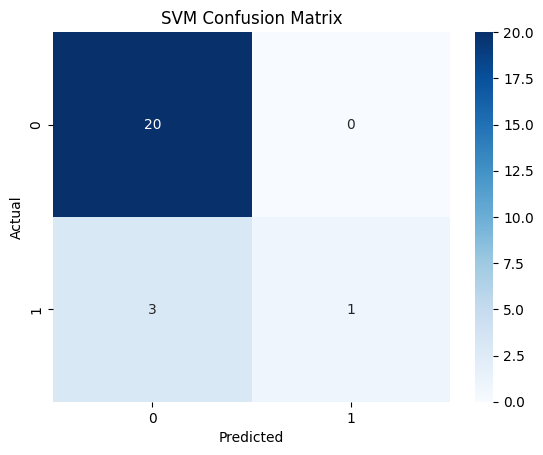

In [130]:
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("SVM Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

#### currently accuracy is low and precision is 1 , so we'll improve our SVM model

In [131]:
svm = LinearSVC(class_weight='balanced')

calibrated_svm = CalibratedClassifierCV(svm)
calibrated_svm.fit(x_train, y_train)

y_prob = calibrated_svm.predict_proba(x_test)[:,1]

# custom threshold (more bug detection)
threshold = 0.30
y_pred_new = (y_prob >= threshold).astype(int)


first_improved_svm_report = classification_report(y_test, y_pred_new)
print(first_improved_svm_report)


              precision    recall  f1-score   support

           0       0.83      1.00      0.91        20
           1       0.00      0.00      0.00         4

    accuracy                           0.83        24
   macro avg       0.42      0.50      0.45        24
weighted avg       0.69      0.83      0.76        24



c:\Users\KIIT\OneDrive\Desktop\assignment-1\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\KIIT\OneDrive\Desktop\assignment-1\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\KIIT\OneDrive\Desktop\assignment-1\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier,

#### recall is still 1 so svm needs more improvement

## Balancing the current dataset using SMOTE , and then again train our SVM model

In [132]:
smote = SMOTE(random_state=42)

x_train_bal, y_train_bal = smote.fit_resample(x_train, y_train)

print("Before SMOTE:\n", y_train.value_counts())
print("\nAfter SMOTE:\n", pd.Series(y_train_bal).value_counts())


Before SMOTE:
 Bug
0    79
1    13
Name: count, dtype: int64

After SMOTE:
 Bug
0    79
1    79
Name: count, dtype: int64


In [133]:
# retraing svm on balanced data
svm_model = LinearSVC()

svm_model.fit(x_train_bal, y_train_bal)

y_pred = svm_model.predict(x_test)

second_improved_svm_report = classification_report(y_test, y_pred)
print(second_improved_svm_report)


              precision    recall  f1-score   support

           0       0.83      1.00      0.91        20
           1       0.00      0.00      0.00         4

    accuracy                           0.83        24
   macro avg       0.42      0.50      0.45        24
weighted avg       0.69      0.83      0.76        24



c:\Users\KIIT\OneDrive\Desktop\assignment-1\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\KIIT\OneDrive\Desktop\assignment-1\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\KIIT\OneDrive\Desktop\assignment-1\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier,

## Preparing the Dataset for the Deep Learning

### we no longer will use TF-IDF for vectorization , we'll now use Tokenization

In [134]:
max_words = 10000
max_len = 400

tokenizer = Tokenizer(num_words=max_words, oov_token="<UNK>")
tokenizer.fit_on_texts(df['clean_code'])

sequences = tokenizer.texts_to_sequences(df['clean_code'])
X_seq = pad_sequences(sequences, maxlen=max_len)

y_seq = df['Bug'].values

print("Tokenization complete")
print("Shape:", X_seq.shape)

Tokenization complete
Shape: (116, 400)


## Train-Test split

In [135]:
x_train, x_test, y_train, y_test = train_test_split(
    X_seq, y_seq,
    test_size=0.2,
    stratify=y_seq,
    random_state=42
)


## BiLSTM MODEL

In [136]:
model = Sequential([
    Embedding(input_dim=10000, output_dim=128, input_shape=(400,)),

    Bidirectional(LSTM(64)),

    Dropout(0.5),

    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

model.summary()

c:\Users\KIIT\OneDrive\Desktop\assignment-1\.venv\Lib\site-packages\keras\src\layers\core\embedding.py:103: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ (None, 400, 128)       │     1,280,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ (None, 128)            │        98,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,382,977 (5.28 MB)

 Trainable params: 1,382,977 (5.28 MB)

 Non-trainable params: 0 (0.00 B)

In [141]:
early_stop = EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True)
history = model.fit(
    x_train, y_train,
    epochs=50,
    batch_size=8,
    validation_split=0.2,
    callbacks= early_stop,
    verbose=1
)


Epoch 1/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 128ms/step - accuracy: 1.0000 - loss: 1.2089e-04 - val_accuracy: 0.9474 - val_loss: 0.2467
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 128ms/step - accuracy: 1.0000 - loss: 6.5635e-05 - val_accuracy: 0.9474 - val_loss: 0.2486
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 125ms/step - accuracy: 1.0000 - loss: 1.1958e-04 - val_accuracy: 0.9474 - val_loss: 0.2501
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 127ms/step - accuracy: 1.0000 - loss: 8.8849e-05 - val_accuracy: 0.9474 - val_loss: 0.2523
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 137ms/step - accuracy: 1.0000 - loss: 9.5332e-05 - val_accuracy: 0.9474 - val_loss: 0.2548
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 125ms/step - accuracy: 1.0000 - loss: 6.6513e-05 - val_accuracy: 0.9474 - val_loss: 0.2570
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 146ms/step - accuracy: 1.0000 - loss: 1.6976e-04 - val_accuracy: 0.9474 - val_loss: 0.2588
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 146ms/step - accuracy: 1.0000 - los

In [142]:
# Predict probabilities
y_prob = model.predict(x_test)

# Convert to class (default threshold 0.5)
y_pred = (y_prob >= 0.5).astype(int)

normal_BiLSTM_report = classification_report(y_test, y_pred)
print(normal_BiLSTM_report)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
              precision    recall  f1-score   support

           0       0.83      1.00      0.91        20
           1       0.00      0.00      0.00         4

    accuracy                           0.83        24
   macro avg       0.42      0.50      0.45        24
weighted avg       0.69      0.83      0.76        24



c:\Users\KIIT\OneDrive\Desktop\assignment-1\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\KIIT\OneDrive\Desktop\assignment-1\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\KIIT\OneDrive\Desktop\assignment-1\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier,

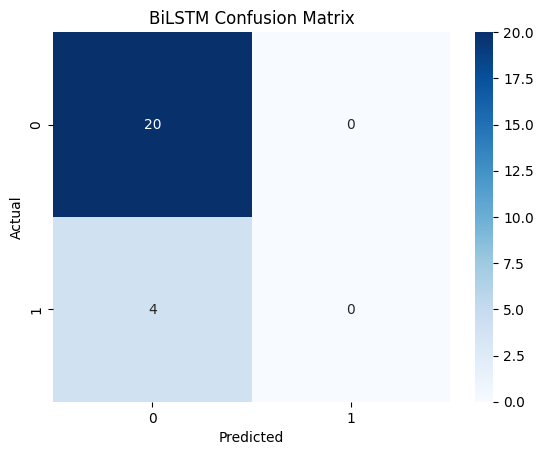

In [143]:

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("BiLSTM Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## Final Comparision of ALL Models

In [144]:
print('normal_random_forest_report')
print(normal_random_forest_report)

print("tuned_random_forest_report")
print(tuned_random_forest_report)


normal_random_forest_report
              precision    recall  f1-score   support

           0       0.83      1.00      0.91        20
           1       0.00      0.00      0.00         4

    accuracy                           0.83        24
   macro avg       0.42      0.50      0.45        24
weighted avg       0.69      0.83      0.76        24

tuned_random_forest_report
              precision    recall  f1-score   support

           0       0.89      0.85      0.87        20
           1       0.40      0.50      0.44         4

    accuracy                           0.79        24
   macro avg       0.65      0.68      0.66        24
weighted avg       0.81      0.79      0.80        24



In [145]:
print('normal_svm_report')
print(normal_svm_report)

print('first_improved_svm_report')
print(first_improved_svm_report)

print('second_improved_svm_report')
print(second_improved_svm_report)

normal_svm_report
              precision    recall  f1-score   support

           0       0.87      1.00      0.93        20
           1       1.00      0.25      0.40         4

    accuracy                           0.88        24
   macro avg       0.93      0.62      0.67        24
weighted avg       0.89      0.88      0.84        24

first_improved_svm_report
              precision    recall  f1-score   support

           0       0.83      1.00      0.91        20
           1       0.00      0.00      0.00         4

    accuracy                           0.83        24
   macro avg       0.42      0.50      0.45        24
weighted avg       0.69      0.83      0.76        24

second_improved_svm_report
              precision    recall  f1-score   support

           0       0.83      1.00      0.91        20
           1       0.00      0.00      0.00         4

    accuracy                           0.83        24
   macro avg       0.42      0.50      0.45        24
wei

In [146]:

print('normal_BiLSTM_report')
print(normal_BiLSTM_report)


normal_BiLSTM_report
              precision    recall  f1-score   support

           0       0.83      1.00      0.91        20
           1       0.00      0.00      0.00         4

    accuracy                           0.83        24
   macro avg       0.42      0.50      0.45        24
weighted avg       0.69      0.83      0.76        24



## Conclusion : BiLSTM performed best for the PROMISE-2 dataset with an accuracy of 83%.

# Conclusion

DNN model performed best for the first dataset that is ("https://github.com/ssea-lab/PROMISE.git") with an accuracy of 72%.
and 
BiLSTM model performed best for the second dataset that is ("https://github.com/alrz1999/PROMISE-dataset-csv.git) with an accuracy of 83%

#### -----------------------Submitted By------------------------
#### Name : Shreyash Kashyap 
#### Roll : 
#### Sec : 